### Problem Statement

##### Background:
Yulu, India’s leading micro-mobility service provider, has experienced notable declines in revenue recently. To address this challenge, Yulu has enlisted the expertise of a consulting company to investigate the factors influencing the demand for shared electric cycles in the Indian market.
##### Objective:
The primary objective of this analysis is to identify significant variables that predict the demand for shared electric cycles in the Indian market. Additionally, we aim to assess the extent to which these variables explain the fluctuations in electric cycle demand.
##### Key Questions:
Which variables play a significant role in predicting the demand for shared electric cycles in the Indian market?
How effectively do these variables capture variations in electric cycle demand?

### Dataset 
**Dataset link:** [yulu_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

* **datetime:** datetime
* **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
* **holiday:** whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
* **weather:**
  * 1: Clear, Few clouds, partly cloudy, partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp:** temperature in Celsius
* **atemp:** feeling temperature in Celsius
* **humidity:** humidity
* **windspeed:** wind speed
* **casual:** count of casual users
* **registered:** count of registered users
* **count:** count of total rental bikes including both casual and registered

### Import necessary libraries
* **pandas (pd):** Pandas is a powerful data manipulation and analysis library for Python, providing data structures like DataFrames for efficient handling of structured data.
* **numpy (np):** NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
* **seaborn (sns):** Seaborn is a statistical data visualization library built on top of Matplotlib. It simplifies the process of creating attractive and informative statistical graphics.
* **matplotlib.pyplot (plt):** Matplotlib is a 2D plotting library for Python. Pyplot is a collection of functions that make matplotlib work like MATLAB. It provides a convenient interface for creating various types of plots and charts.
* **scipy.stats:** Offers a wide range of statistical functions and probability distributions, including descriptive statistics, hypothesis tests, and random number generation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, shapiro, levene

### 1 Analysing basic metrics

#### 1.1 Read data

In [2]:
#### Read csv file
data = pd.read_csv('yulu_data.csv')

#### 1.2 Shape of data
It provides the dimensions (number of rows and columns) of the DataFrame

In [3]:
data.shape

(10886, 12)

Our data has 10886 rows and 12 features

#### 1.3 inspecting the first few rows (with head()) and the last few rows (with tail()) of a DataFrame

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


#### 1.4 check datatype

In [6]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Need to change datatypes 
* datetime --> object to datetime format
* season, holiday, workingday and weather --> int to char

#### 1.5 Check duplicate values


In [7]:
data.duplicated().sum()

0

Dataset doesn't hold duplicate entries


#### 1.6 Check null values
df.isna() returns a DataFrame of the same shape as the input, where each element is a boolean indicating whether the corresponding element in the original DataFrame is NaN (missing) or not.

In [8]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### 1.7 Five point summary of  features 
df.describe() provides basic statistical information (count, mean, std, min, 25%, 50%, 75%, and max) about the numerical columns in the DataFrame. Together, they offer a comprehensive view of the DataFrame's structure and content.

In [9]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##### Insights
* Average observations belongs to summer and fall season
* There appears to be a small proportion of observations that are holidays, as the mean holiday value is close to zero.
* The majority of observations fall under weather category 1 or 2, indicating relatively good weather conditions, 50% of observations falls below category 1 (Indicating weather is clear)
* Average temperature is around 20 degrees Celsius and feeling temperature (atemp) is around 23 degrees Celsius:
* 25% of the observations have a humidity level below 47
* The Average wind speed is between 12-13
* 75% of observations are below 284 counts: This suggests that a significant portion of the observations have a count of rental bikes (casual + registered) below 284,


#### 1.8. Info()
df.info() gives a concise summary of the DataFrame including data types and missing values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [45]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


#### 1.9. Datatype Conversion

In [11]:
### convert datetime
data['datetime'] = pd.to_datetime(data['datetime'])

#### 1.10. Add new columns

In [12]:
#### Create new column year to get the year wise data
data['year'] = data['datetime'].dt.year

In [13]:
#### Create new column month to get the month wise data
data['month'] = data['datetime'].dt.month

In [14]:
#### convert season, holiday, workingday and weather columns datatype--> int to char
convert = ['season','holiday','workingday','weather','month','year']
# Convert selected columns to string data type using lambda function
data[convert] = data[convert].apply(lambda x: x.astype(str))


In [15]:
data.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                  object
month                 object
dtype: object

In [47]:
data['quarter'] = pd.to_datetime(data['datetime']).apply(lambda x: 'Q'+str((x.month-1)//3+2))

In [48]:
data['quarter']

0        Q2
1        Q2
2        Q2
3        Q2
4        Q2
         ..
10881    Q5
10882    Q5
10883    Q5
10884    Q5
10885    Q5
Name: quarter, Length: 10886, dtype: object

In [49]:
data['quarter'] = pd.to_datetime(data['datetime']).dt.quarter

In [51]:
data['quarter'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: quarter, dtype: int64

In [54]:
data['quarter1'] = pd.to_datetime(data['datetime']).dt.month // 3 + 2

In [56]:
data['quarter2'] = pd.to_datetime(data['datetime']).apply(lambda x: 'Q'+str((x.month-1)//3+1).zfill(2))

In [58]:
data['quarter4'] = pd.to_datetime(data['datetime']).apply(lambda x: 'Q'+str((x.month-1)//3+2))

In [59]:
data.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,quarter,quarter1,quarter2,quarter4
44,2011-01-02 21:00:00,1,0,0,1,10.66,11.365,44,22.0028,11,20,31,2011,1,1,2,Q01,Q2
8804,2012-08-09 05:00:00,3,0,1,2,27.06,29.545,94,0.0000,4,37,41,2012,8,3,4,Q03,Q4
3027,2011-07-15 01:00:00,3,0,1,1,25.42,29.545,73,12.9980,7,13,20,2011,7,3,4,Q03,Q4
8184,2012-07-02 09:00:00,3,0,1,1,31.98,34.850,46,16.9979,56,239,295,2012,7,3,4,Q03,Q4
4150,2011-10-04 23:00:00,4,0,1,1,19.68,23.485,77,8.9981,6,60,66,2011,10,4,5,Q04,Q5
4435,2011-10-16 20:00:00,4,0,0,1,22.14,25.760,52,31.0009,49,129,178,2011,10,4,5,Q04,Q5
6677,2012-03-15 12:00:00,1,0,1,2,25.42,31.060,50,8.9981,59,206,265,2012,3,1,3,Q01,Q2
258,2011-01-12 05:00:00,1,0,1,1,5.74,7.575,86,11.0014,0,5,5,2011,1,1,2,Q01,Q2
2090,2011-05-14 00:00:00,2,0,0,2,20.50,24.240,88,8.9981,24,78,102,2011,5,2,3,Q02,Q3
5127,2011-12-07 17:00:00,4,0,1,3,16.40,20.455,100,22.0028,4,48,52,2011,12,4,6,Q04,Q5


### 2 Univariate Analysis

#### 2.1 Non Graphical Analysis

In [17]:
#### Separate the categorical and numerical features 
cat = []
num = []
for col in data.columns:
    if data[col].dtypes == 'object':
        cat.append(col)
    else:
        num.append(col)

In [18]:
cat_data = data[cat]
cat_data.head()

,season,holiday,workingday,weather,year,month
0,1,0,0,1,2011,1
1,1,0,0,1,2011,1
2,1,0,0,1,2011,1
3,1,0,0,1,2011,1
4,1,0,0,1,2011,1


In [19]:
num_data = data[num]
num_data.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,9.84,14.395,75,0.0,0,1,1


In [20]:
#### Count and print Unique values of each categorical features
for col in cat_data:
    print("Unique values in column {} are : {} ".format(col,data[col].unique()))

Unique values in column season are : ['1' '2' '3' '4'] 
Unique values in column holiday are : ['0' '1'] 
Unique values in column workingday are : ['0' '1'] 
Unique values in column weather are : ['1' '2' '3' '4'] 
Unique values in column year are : ['2011' '2012'] 
Unique values in column month are : ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12'] 


In [21]:
#### Check count of each value in categorical column
for col in cat_data:
    print("Values count for column {} is :".format(col))
    print(data[col].value_counts(),"\n")

Values count for column season is :
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64 

Values count for column holiday is :
0    10575
1      311
Name: holiday, dtype: int64 

Values count for column workingday is :
1    7412
0    3474
Name: workingday, dtype: int64 

Values count for column weather is :
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64 

Values count for column year is :
2012    5464
2011    5422
Name: year, dtype: int64 

Values count for column month is :
5     912
7     912
12    912
6     912
8     912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64 



In [22]:
for col in num_data:
    if col == 'datetime':
        continue
    print("The column {} have min {}, max {} and average value is {}".format(col,data[col].min(), data[col].max(),data[col].mean()))

The column temp have min 0.82, max 41.0 and average value is 20.230859819952173
The column atemp have min 0.76, max 45.455 and average value is 23.65508405291192
The column humidity have min 0, max 100 and average value is 61.88645967297446
The column windspeed have min 0.0, max 56.9969 and average value is 12.799395406945093
The column casual have min 0, max 367 and average value is 36.02195480433584
The column registered have min 0, max 886 and average value is 155.5521771082124
The column count have min 1, max 977 and average value is 191.57413191254824


#### Insights
* There are approximately the same number of data points for each season, with a slight variation.
* Most of the data points (10575 out of 10886) correspond to non-holiday days (holiday = 0),there are fewer data points (311 out of 10886) corresponding to holiday days (holiday = 1).
* The majority of data points (7412 out of 10886) correspond to working days (workingday = 1),there are fewer data points (3474 out of 10886) corresponding to non-working days (workingday = 0).
* Most of the data points (7192 out of 10886) correspond to clear weather conditions (weather = 1),there are fewer data points for other weather conditions, with 2834 data points for misty/cloudy weather (weather = 2), 859 data points for light rain/snow/thunderstorm (weather = 3), and only 1 data point for heavy rain/ice pallets/thunderstorm (weather = 4).
* There are slightly more observations from 2012 (5464) compared to 2011 (5422), but the difference is relatively small.
* The months of July (7), December (12), and August (8) have the highest count of observations, each with 912 data points.

#### 2.2 Graphical Analysis

* **Frequency Distribution:** Calculate the frequency (count) of each category in the categorical feature.
* **Bar Plot:** Visualize the frequency distribution using a bar plot to see the distribution of categories.
* **Percentage Distribution:** Calculate the percentage of each category relative to the total number of observations.
* **Pie Chart:** Visualize the percentage distribution using a pie chart to understand the proportion of each category.

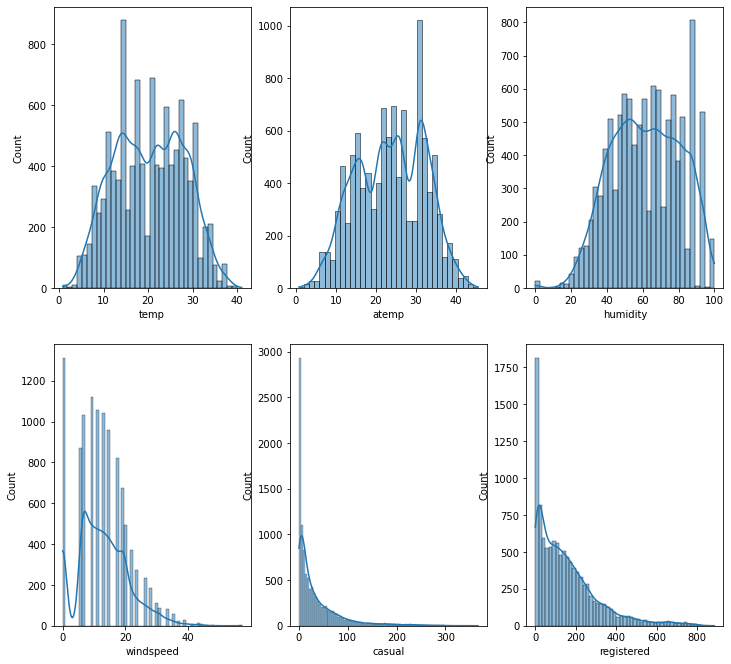

In [23]:
### Understanding distribution of Numerical features
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=num_data, x="temp", kde=True, ax=axis[0,0])
sns.histplot(data=num_data, x="atemp", kde=True, ax=axis[0,1])
sns.histplot(data=num_data, x="humidity", kde=True, ax=axis[0,2])
sns.histplot(data=num_data, x="windspeed", kde=True, ax=axis[1,0])
sns.histplot(data=num_data, x="casual", kde=True, ax=axis[1,1])
sns.histplot(data=num_data, x="registered", kde=True, ax=axis[1,2])
plt.show()

#### Insights
* The distribution of temp and atemp is normal distribution
* The distribution of humidity is slightly left skewed
* The distribution of windspeed, casual and registered feature is right skewed

In [24]:
cat_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'year', 'month'], dtype='object')

<AxesSubplot:xlabel='month', ylabel='count'>

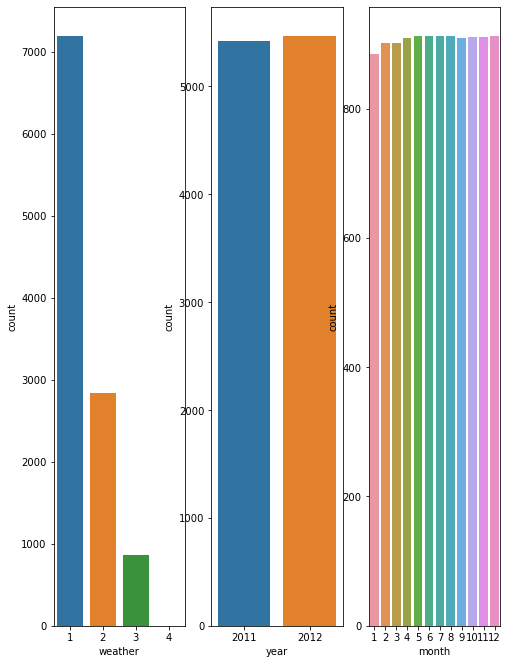

In [25]:
fig, axis = plt.subplots( ncols=3, figsize=(8, 8))
fig.subplots_adjust(top=1.2)
sns.countplot(data=cat_data, x="weather", ax=axis[0])
sns.countplot(data=cat_data, x="year", ax=axis[1])
sns.countplot(data=cat_data, x="month", ax=axis[2])

Text(0.5, 1.0, 'Percentage Distribution of working day')

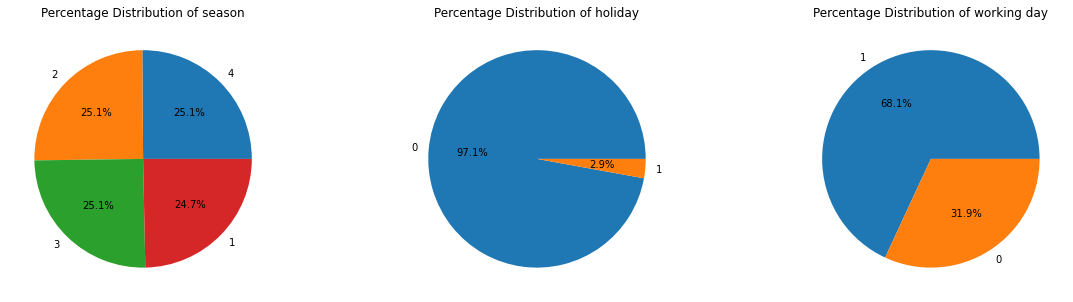

In [26]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# Percentage distribution pie chart
axs[0].pie(cat_data['season'].value_counts(),labels=cat_data['season'].value_counts().index, autopct='%1.1f%%')
axs[0].set_title('Percentage Distribution of season')
axs[1].pie(cat_data['holiday'].value_counts(),labels=cat_data['holiday'].value_counts().index, autopct='%1.1f%%')
axs[1].set_title('Percentage Distribution of holiday')
axs[2].pie(cat_data['workingday'].value_counts(),labels=cat_data['workingday'].value_counts().index, autopct='%1.1f%%')
axs[2].set_title('Percentage Distribution of working day')

#### Insights
* most of the observation comes for clear weather
* For month January we have slightly less observations
* All seasons have approximatly equal observations
* For holiday we have approximate 3% observations
* Working days have more percentage of distribution around 68% than non-woeking days

### 3 Bivariate Analysis
To perform bivariate analysis on the given dataset, we can explore the relationships between pairs of variables. Since the dataset consists of both numerical and categorical variables, we'll need to use different methods for each type of variable.

Here's how we can proceed:

**For numerical vs. numerical variables:**

**Scatter plot:** We can create scatter plots to visualize the relationship between two numerical variables. This helps us understand if there's any correlation or pattern between them.

**For categorical vs. categorical variables:**

**Cross-tabulation:** We can create a contingency table to see the frequency distribution of one categorical variable with respect to another categorical variable. This helps us understand if there's any association between the two variables.

**For categorical vs. numerical variables:**

**Box plot or violin plot:** We can create box plots or violin plots to visualize the distribution of a numerical variable for each category of a categorical variable. This helps us understand if there are any differences in the distribution of the numerical variable across different categories of the categorical variable.

#### 3.1 Numerical and Numerical features

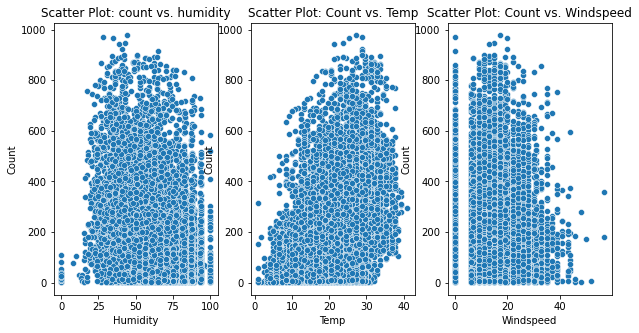

In [27]:
# Scatter plot for humidity, temp, windspeed
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
sns.scatterplot(x='humidity', y='count', data=data,ax=axs[0])
axs[0].set_title('Scatter Plot: count vs. humidity')
axs[0].set_xlabel('Humidity')
axs[0].set_ylabel('Count')
sns.scatterplot(x='temp', y='count', data=data,ax=axs[1])
axs[1].set_title('Scatter Plot: Count vs. Temp')
axs[1].set_xlabel('Temp')
axs[1].set_ylabel('Count')
sns.scatterplot(x='windspeed', y='count', data=data,ax=axs[2])
axs[2].set_title('Scatter Plot: Count vs. Windspeed')
axs[2].set_xlabel('Windspeed')
axs[2].set_ylabel('Count')
plt.show()

#### 3.2 Categorical and Numerical Features

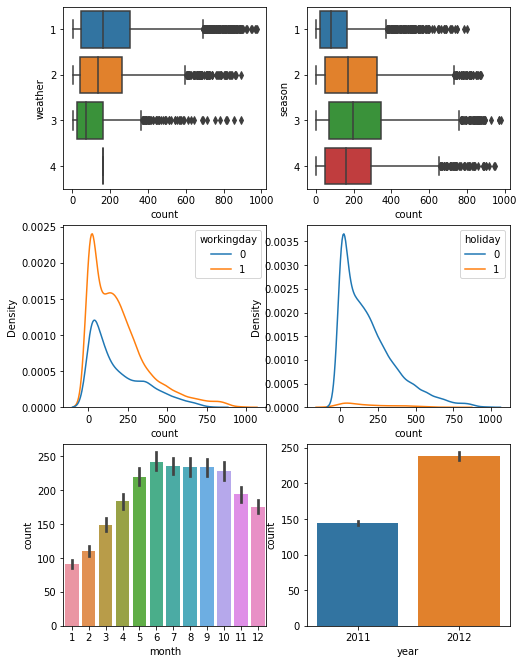

In [28]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=data, x="count",y = "weather",ax=axis[0,0])
sns.boxplot(data=data, x="count", y="season", ax=axis[0,1])
sns.kdeplot(data=data, x="count", hue= 'workingday', ax=axis[1,0])
sns.kdeplot(data=data, x="count", hue = 'holiday', ax=axis[1,1])
sns.barplot(data=data,  x="month",y="count",estimator = np.mean, ax=axis[2,0])
sns.barplot(data=data,  x="year",y="count",estimator = np.mean, ax=axis[2,1])
plt.show()

#### 3.3 Category and Category

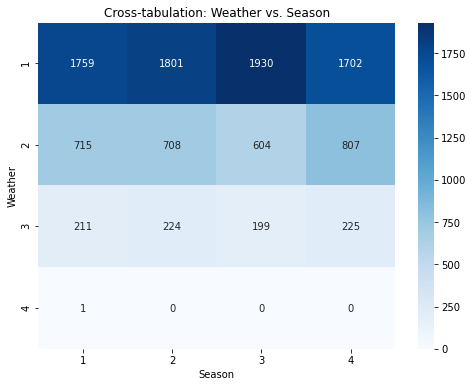

In [29]:
# Cross-tabulation for Weather vs. Season
contingency_table = pd.crosstab(data['weather'], data['season'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Cross-tabulation: Weather vs. Season')
plt.xlabel('Season')
plt.ylabel('Weather')
plt.show()

#### Insights
* Numerical features Humidity, Tempreture, Windspeed doesn't have any correlation with target colum count
* There is 50% i.e count between 50- 300 obervations likely to share electric cycle in indian market when weather is clear
* When weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog only single observation like to share electric cycle
* In spring season very few observations range between 50-150 like to share electric cycle as compare to other seasons
* On average observations in june month like to share electric cycle in indian market
* Observations in month January less likely to share electric cycle
* Season fall and weather  Clear, Few clouds, partly cloudy, partly cloudy have postive corrletion
* Since the distribution of count w.r.t workingday and holiday is right-skewed, we observe a gradual decrease in density towards higher values, reflecting the long tail of observation who more likely to share electric cycle.


#### 4  Check correlation

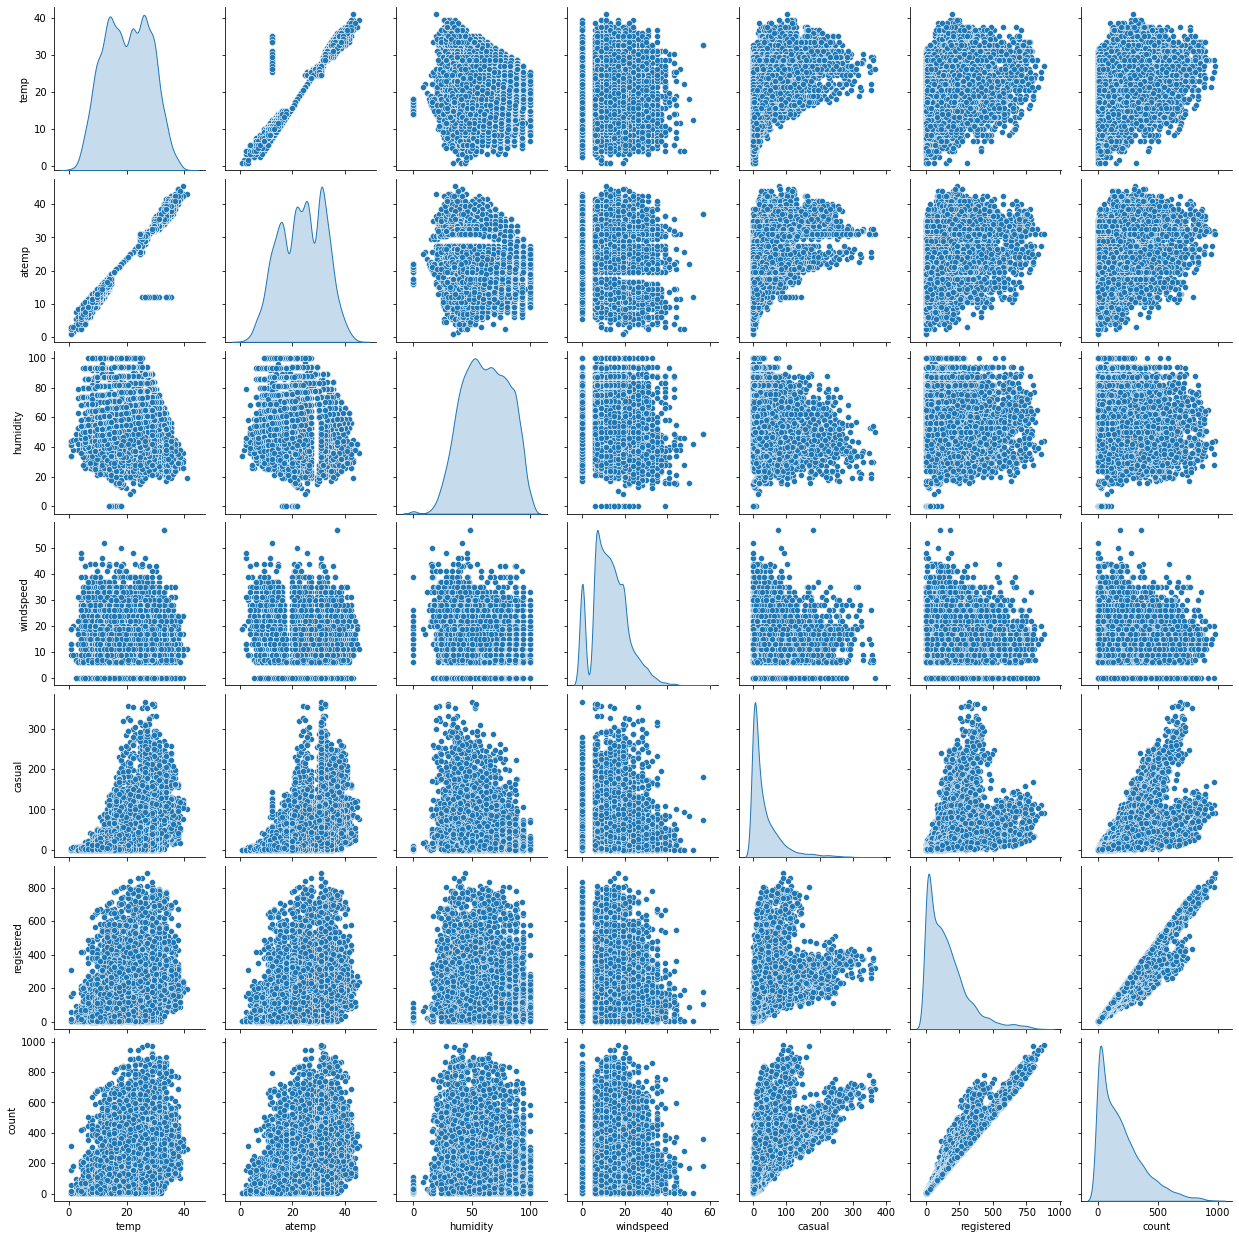

In [30]:
sns.pairplot(data, diag_kind='kde')

plt.show()

#### Insights
* temp and atemp have positive correlation with each other
* Target column count have only positive correlation with registered feature and slightly positive correlation with casual
* other feature neither have correlation with each other nor with target feature 

####  5 Outlier Detections

In [31]:
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype != 'object':  # Exclude non-numeric columns
            Q1 = np.percentile(df[column], 25)
            Q3 = np.percentile(df[column], 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers[column] = len(outlier_data)
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(data)

# Print the number of outliers for each numerical feature
for column, count in outliers.items():
    print(f"Feature {column} has {count} outliers.")

Feature datetime has 0 outliers.
Feature temp has 0 outliers.
Feature atemp has 0 outliers.
Feature humidity has 22 outliers.
Feature windspeed has 227 outliers.
Feature casual has 749 outliers.
Feature registered has 423 outliers.
Feature count has 300 outliers.


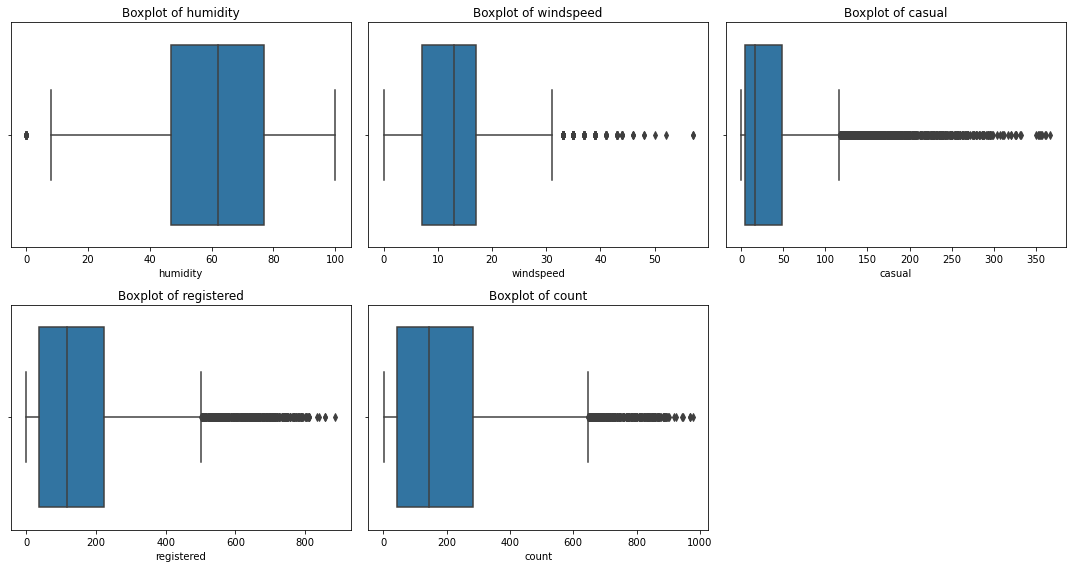

In [32]:
# Define the numerical columns for which you want to detect outliers
numerical_columns = ['humidity', 'windspeed', 'casual', 'registered', 'count']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### Insights
* Casual feature have highest outliers
* humidity feature have very few outliers towards lower side
* windspeed, casual, rigisteted, count these have towards higher side outliers

### 6 Hypothesis Testing

* In statistical hypothesis testing, the null hypothesis (denoted as H0) is a statement or assumption that there is no significant difference or effect, or no relationship between variables.
* The alternate hypothesis (denoted as Ha or H1)is the statement that contradicts the null hypothesis. It suggests that there is a significant difference, effect, or relationship present in the population

* The p-value is a measure that helps determine the strength of evidence against the null hypothesis. It represents the probability of obtaining test results at least as extreme as the observed results, assuming that the null hypothesis is true.

* The alpha value is the predetermined threshold for the p-value, typically set at 0.05 (5%). If the calculated p-value is less than or equal to the alpha value, the null hypothesis is rejected, indicating that the results are statistically significant. If the p-value is greater than the alpha value, the null hypothesis is not rejected.

#### Types of hypothesis Testing

* **Sample t-test:** Assesses whether the means of two groups are statistically different from each other based on their sample data.

* **ANOVA (Analysis of Variance):** Determines if there are statistically significant differences between the means of three or more independent groups.

* **Chi-square test:** Evaluates the association between categorical variables by comparing observed and expected frequencies in a contingency table.

#### 6.1 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

Test if working day has an effect on the number of electric cycles rented.
* Null hypothesis (H0): There is no difference in the number of cycles rented between working days and non-working days.
* Alternative hypothesis (H1): The number of cycles rented differs between working days and non-working days

In [33]:
workingday = data[data['workingday'] == '1']['count']
nonworkingday = data[data['workingday'] == '0']['count']
alpha = 0.05
tstats, pvalue = ttest_ind(workingday, nonworkingday)
print("2-Sample T-Test:")
print("T-statistic:", tstats)
print("P-value:", pvalue)
if pvalue < alpha:
    print("Reject Null hypothesis, i.e The number of cycles rented differs between working days and non-working days")
else:
    print("Fail to reject null hypothesis, i.e There is no difference in the number of cycles rented between working days and non-working days.")


2-Sample T-Test:
T-statistic: 1.2096277376026694
P-value: 0.22644804226361348
Fail to reject null hypothesis, i.e There is no difference in the number of cycles rented between working days and non-working days.


In [34]:
data[data['workingday'] == '1']['count'].mean()

193.01187263896384

In [35]:
data[data['workingday'] == '0']['count'].mean()

188.50662061024755

#### 6.2 ANOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 

#### Check ANOVA Assumptions 
To check the assumptions of one-way ANOVA, we typically focus on two main assumptions:

* **Homogeneity of Variances (Homoscedasticity):**

This assumption states that the variance of the dependent variable is the same across all levels of the independent variable (i.e., groups).
To check for homogeneity of variances, we can use statistical tests such as Levene's test.
* **Normality:**

This assumption states that the residuals (the differences between observed and predicted values) are normally distributed for each group.
Normality can be assessed visually using histograms or quantile-quantile (Q-Q) plots and statistically using tests like the Shapiro-Wilk test.

In [36]:
#### Shapiro test to check weather normality
## H0 : Data is Gaussian
## H1: Data is not Gaussian
# Subset the data for relevant columns
weather_data = data[['weather', 'count']]
s_test, pval = shapiro(weather_data['count'])
print(" Statistical Value of shapiro test : ",s_test)
print("Pvalue of Shapiro test: ", pval)
alpha = 0.05
if pval < alpha:
    print("Reject Null hypothesis, Data is not Gausssian")
else:
    print("Fail to reject null hypothesis, Data is Gaussian")



 Statistical Value of shapiro test :  0.8783667087554932
Pvalue of Shapiro test:  0.0
Reject Null hypothesis, Data is not Gausssian


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<AxesSubplot:xlabel='count', ylabel='Count'>

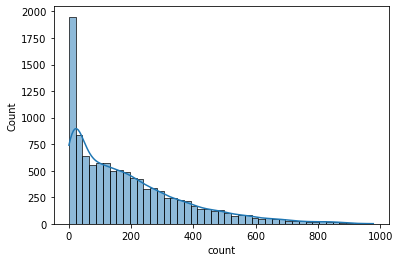

In [37]:
sns.histplot(data['count'], kde = True)

In [38]:
# Variance test for Weather feature using levene test
# Exclude missing values and ensure each weather category has sufficient data points
# H0 : Variance are equal
# H1 : Variance are not equal
weather_counts = data['weather'].value_counts()
weather_categories = weather_counts.index.tolist()

weather_data = []
for category in weather_categories:
    category_data = data[data['weather'] == category]['count'].dropna()
    weather_data.append(category_data)

# Perform variance test
variance_test, pval = levene(*weather_data)
print("Value of statistical test : ", variance_test)
print("P value of test : ", pval)

alpha = 0.05
if pval < alpha:
    print("Reject null hypothesis, variances are not equal")
else:
    print("Fail to reject null hypothesis, variances are equal")


Value of statistical test :  54.85106195954556
P value of test :  3.504937946833238e-35
Reject null hypothesis, variances are not equal


In [39]:
#### Shapiro test to check season normality
## H0 : Data is Gaussian
## H1: Data is not Gaussian
# Subset the data for relevant columns
season_data = data[['season', 'count']]
s_test, pval = shapiro(season_data['count'])
print(" Statistical Value of shapiro test : ",s_test)
print("Pvalue of Shapiro test: ", pval)
alpha = 0.05
if pval < alpha:
    print("Reject Null hypothesis, Data is not Gausssian")
else:
    print("Fail to reject null hypothesis, Data is Gaussian")


 Statistical Value of shapiro test :  0.8783667087554932
Pvalue of Shapiro test:  0.0
Reject Null hypothesis, Data is not Gausssian


C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
# Variance test for seaason feature using levene test
# H0 : Variance are equal
# H1 : Variance are not equal
season_counts = data['season'].value_counts()
season_categories = season_counts.index.tolist()

season_data = []
for category in season_categories:
    category_data = data[data['season'] == category]['count'].dropna()
    season_data.append(category_data)

# Perform variance test
variance_test, pval = levene(*season_data)
print("Value of statistical test : ", variance_test)
print("P value of test : ", pval)

alpha = 0.05
if pval < alpha:
    print("Reject null hypothesis, variances are not equal")
else:
    print("Fail to reject null hypothesis, variances are equal")

Value of statistical test :  187.7706624026276
P value of test :  1.0147116860043298e-118
Reject null hypothesis, variances are not equal


#### Insights
* The data does not follow a Gaussian distribution, indicating that it may have a skewed or non-normal distribution.
* The variances of the data samples are not equal across different weather categories, suggesting that there are significant differences in variability between these categories.

**One way ANOVA For weather:**
* H0: The mean number of cycles rented is the same across different weather conditions.
* H1: The mean number of cycles rented varies across different weather conditions.

In [41]:
weather_data = data.groupby(by = 'weather')['count'].apply(list)

In [42]:
f_stats, pvalue = f_oneway(*weather_data)
print(pvalue)
alpha = 0.05
print("ANOVA  report for Weather:")
print("F-statistic:", f_stats)
print("P-value:", pvalue)
if pvalue < alpha:
    print("Reject Null hypothesis, The mean number of cycles rented varies across different weather conditions.")
else:
    print("Fail to reject null hypothesis,The mean number of cycles rented is the same across different weather conditions. ")

5.482069475935669e-42
ANOVA  report for Weather:
F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Reject Null hypothesis, The mean number of cycles rented varies across different weather conditions.


**One way ANOVA For season:**
* H0: The mean number of cycles rented is the same across different seasons.
* H1: The mean number of cycles rented varies across different seasons.

In [43]:
season_data = data.groupby(by = 'season')['count'].apply(list)
f_stats, pvalue = f_oneway(*season_data)
print(pvalue)
alpha = 0.05
print("ANOVA  report for Season:")
print("F-statistic:", f_stats)
print("P-value:", pvalue)
if pvalue < alpha:
    print("Reject null hypothesis, The mean number of cycles rented varies across different seasons.")
else: 
    print("Fail to reject null hypothesis, The mean number of cycles rented is the same across different seasons.")

6.164843386499654e-149
ANOVA  report for Season:
F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149
Reject null hypothesis, The mean number of cycles rented varies across different seasons.


#### 6.3 Chi-square test to check if Weather is dependent on the season

* Null hypothesis (H0): Weather is independent of the season.
* Alternative hypothesis (H1): Weather is dependent on the season.

In [44]:
# Chi-Square Test
observed = pd.crosstab(data['weather'], data['season'])
chi2_stat, pval, dof, expected = chi2_contingency(observed)
alpha = 0.05
print("Chi-Square Test:")
print("Chi2 statistic:", chi2_stat)
print("P-value:", pval)
if pval< alpha:
    print("Reject null hypothesis, Weather is dependent on the season.")
else:
    print("Fail to reject null hypothesis, Weather is independent of the season")

Chi-Square Test:
Chi2 statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Reject null hypothesis, Weather is dependent on the season.


#### Insights of hypothesis testing
* **Weather and Demand** The p-value for the ANOVA test between weather conditions and demand is extremely small (5.48e-42). This suggests that the mean number of cycles rented varies significantly across different weather conditions.
* **Season and Demand:** The p-value for the ANOVA test between seasons and demand is extremely small (6.16e-149). This implies that the mean number of cycles rented varies significantly across different seasons.
* **Working Day and Demand:** The p-value for the 2-sample t-test between working days and demand is relatively high (0.226). This indicates that there is no significant difference in the number of cycles rented between working days and non-working days.
* **Weather and Season:** The p-value for the chi-square test between weather and season is small (1.55e-07), indicating that weather is dependent on the season.

#### Recommendation based on hypothesis testing
* Implement dynamic pricing strategies where rental fees are adjusted based on weather conditions. For example, offer discounts during rainy or extremely hot days to incentivize usage.
* Can introduce weather-specific promotions or packages, such as "Rainy Day Special" or "Sunny Sunday Discount," to encourage ridership during specific weather patterns.
* Offer exclusive perks or benefits for users who commute on working days,collaborate with corporate partners to promote Yulu as a convenient and eco-friendly commuting option for employees, emphasizing its accessibility on working days.
* Launch seasonal marketing campaigns that resonate with customers' preferences and activities during different seasons. For instance, promote Yulu as an ideal mode of transportation for outdoor activities during spring and summer.
*  Develop predictive analytics models to anticipate weather patterns and their impact on rider behavior. Use this data to optimize fleet deployment and maintenance schedules accordingly.